#Μηχανική Μάθηση - Εργασία 2

**Νικόλαος Μασούρας**

**sdi1800112**

###Ερώτημα 1: Logistic regression & Overfitting

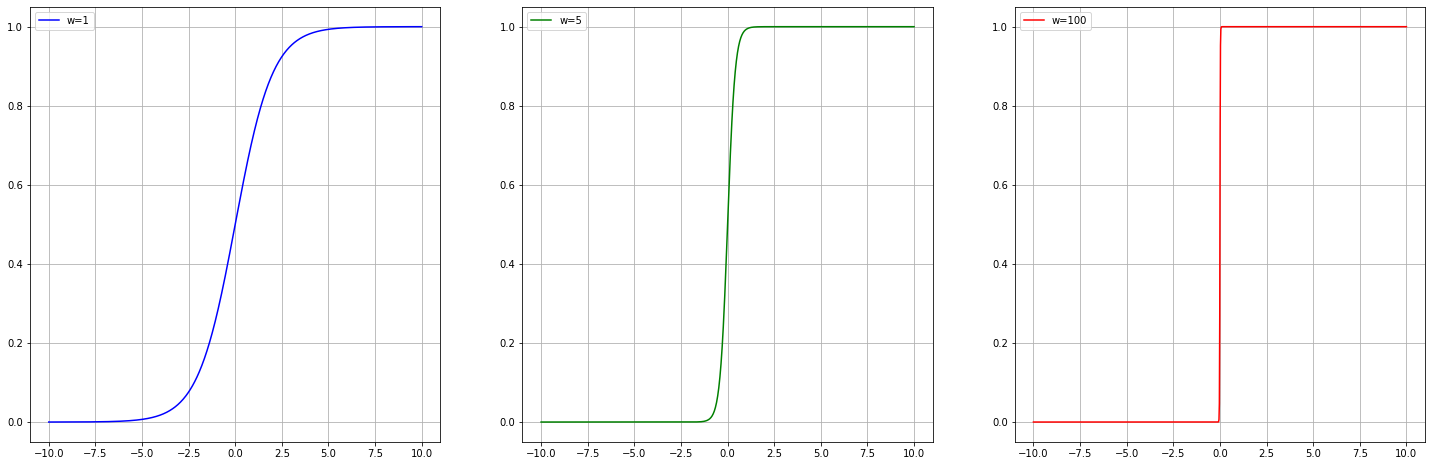

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

def f(x,w):
  return 1/(1 + np.exp(-w*x))

x = np.linspace(-10,10,1000)

fig = plt.figure(figsize = (25, 8))
plt.subplot(1,3,1)
plt.plot(x, f(x,1),label = 'w=1',c = 'blue')
plt.grid(True)
plt.legend()


plt.subplot(1,3,2)
plt.plot(x,f(x,5),label = 'w=5',c = 'green')
plt.grid(True)
plt.legend()


plt.subplot(1,3,3)
plt.plot(x,f(x,100),label = 'w=100',c = 'red')
plt.grid(True)
plt.legend()

plt.show()


Όπως φαίνεται απο τα γραφήματα όσο το w αυξάνεται η logistic regression εμφανίζει συμπεριφορά overifitting.Αυτό φαίνεται καθώς σύμφωνα με το 3ο γράφιμα οι πιθανότητες $p(y = 1|x;w) = f(x;w)$ και $p(y = 0|x;w) = 1- f(x;w)$ είναι 1 για κάθε x δηλαδή το μοντέλο κατηγοριοποιεί τα δεδομένα με μηδενικό σφάλμα.Αυτό μπορεί να αποφευχθεί κάνοντας regularization της παραμέτρου w.Συγκεκριμένα θα χρησιμοποιούσα ridge regression καθώς προσθέτει στη συνάρτηση κόστους τον όρο λ$|w|^2$ οπότε ενθαρρύνει τη χρησιμοποίηση μικρών w.

###Ερώτημα 2: Ridge regression

Οι πίνακες που θα χρησιμοποιηθούν είναι οι εξής:
$β\in ℝ^K,y \in ℝ^N,X\inℝ^{N×K}$

$\sum_{i}^{N}(y_i - \beta^Txi)^2 = (y - X\beta)^T(y - X\beta) = ||y - Χ\beta||^2_2$

$\sum_{k=1}^{K}\beta_k^2 = \beta^T\beta = ||\beta||^2_2$

Άρα το πρόβλημα εκφράζεται ως:

$\beta^* = argmin_{\beta} ||y - Χ\beta||^2_2 + λ||\beta||^2_2$

Λύση σε κλειστή μορφή:

$\nabla_{\beta}[(y - X\beta)^T(y - X\beta) + λ\beta^T\beta]$

$ = ∇_{\beta}[y^Ty - y^TX\beta - (X\beta)^Ty + (X\beta)^T(X\beta) +  λ\beta^T\beta]$

$=^*∇_{\beta}[y^Ty -2\beta^TX^Ty +\beta^TX^TX\beta + λ\beta^T\beta]$

$= -2X^Ty + 2X^TX\beta + 2λ\beta$

$*(X\beta)^Ty = y^T(X\beta)$
,αφού είναι εσωτερικό γινόμενο διανυσμάτων δηλαδή βαθμωτός,
$(X\beta)^Ty = (y^T(X\beta))^T$ και $scalar^T = scalar$


Θέτουμε την παράγωγο ίση με 0:

$-2X^Ty + 2X^TX\beta + 2λ\beta = 0$

$2X^TX\beta + 2λ\beta = 2X^Ty$

$X^TX\beta + λ\beta = X^Ty $

$(X^TX +λI)\beta = X^Ty$

$β^* = (X^TX +λI)^{-1}X^Ty$ , $I \in ℝ^{K×K}$ μοναδιαίος





##Ερώτημα 3:Αναγνώριση Προσώπων (Face recognition)

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

imageLocation = r'/content/gdrive/MyDrive/ML/EX_2/faces'

Mounted at /content/gdrive


In [2]:
from PIL import Image


def loadImage(path):
  i = Image.open(path)

  pixels = i.load()
  width, height = i.size

  vector = np.empty(shape=[2500,1])
  all_pixels = []
  for x in range(width):
    for y in range(height):
        cpixel = pixels[x, y]
        all_pixels.append(cpixel)
  for i in range(len(all_pixels)):
    vector[i] = all_pixels[i]
  mean = np.mean(vector)
  std = np.std(vector)
  vector = vector - mean
  vector = vector / std
  return vector

def loadSet(path,start_num,end_num):
  labels = []
  image_list = np.empty((2500,0))
  for i in range(1,10):
    for j in range(start_num,end_num+1):
      if j < 10:
        curr_image = loadImage(path + '/person0' + str(i) + '_0' + str(j) + '.png')
      else:
        curr_image = loadImage(path + '/person0' + str(i) + '_' + str(j) + '.png')
      image_list = np.append(image_list,curr_image,axis=1)
      labels.append(i)
  for j in range(start_num,end_num+1):
    if j < 10:
      curr_image = loadImage(path + '/person10_0' + str(j) + '.png')
    else:
      curr_image = loadImage(path + '/person10_' + str(j) + '.png')
    image_list = np.append(image_list,curr_image,axis=1)
    labels.append(10)
  return image_list, labels

def loadImages(path, set_number):
  if set_number == "Set_1":
    image_list,labels = loadSet(path,1,7)
  elif set_number == "Set_2":
    image_list,labels = loadSet(path,8,19)
  elif set_number == "Set_3":
    image_list,labels = loadSet(path,20,31)
  elif set_number == "Set_4":
    image_list,labels = loadSet(path,32,45)
  elif set_number == "Set_5":
    image_list,labels = loadSet(path,46,64)
  return image_list,labels

In [3]:
trainImages, labels = loadImages(imageLocation,"Set_1")

In [4]:
from sklearn.decomposition import PCA

smallpcaTrain = PCA(n_components=9).fit(trainImages.T)

largepcaTrain = PCA(n_components=30).fit(trainImages.T)

print(smallpcaTrain.components_.shape)
print(largepcaTrain.components_.shape)

(9, 2500)
(30, 2500)


In [5]:
imagesTrainSmall = smallpcaTrain.transform(trainImages.T)
imagesTrainLarge = largepcaTrain.transform(trainImages.T)

imagesTrainSmall.shape

(70, 9)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

smallModel = KNeighborsClassifier(n_neighbors=1,p=2).fit(imagesTrainSmall,labels)

largeModel = KNeighborsClassifier(n_neighbors=1,p=2).fit(imagesTrainLarge,labels)

In [7]:
from sklearn.metrics import accuracy_score

smallModelPred = smallModel.predict(imagesTrainSmall)

largeModelPred = largeModel.predict(imagesTrainLarge)


print("Set 1 prediction")
print("Accurancy for 9 components: " )
print(accuracy_score(labels, smallModelPred))

print("Accurancy for 30 components: " )
print(accuracy_score(labels, largeModelPred))

for i in range(2,6):
  testSet,testLabels = loadImages(imageLocation,"Set_"+str(i))
  transformTestSmall = smallpcaTrain.transform(testSet.T)
  transformTestLarge = largepcaTrain.transform(testSet.T)
  smallModelPred = smallModel.predict(transformTestSmall)
  largeModelPred = largeModel.predict(transformTestLarge)
  print("Set " + str(i) + " prediction")
  print("Accurancy for 9 components: " )
  print('%.2f'%accuracy_score(testLabels, smallModelPred))
  print("Accurancy for 30 components: " )
  print('%.2f'%accuracy_score(testLabels, largeModelPred))


Set 1 prediction
Accurancy for 9 components: 
1.0
Accurancy for 30 components: 
1.0
Set 2 prediction
Accurancy for 9 components: 
1.00
Accurancy for 30 components: 
1.00
Set 3 prediction
Accurancy for 9 components: 
0.78
Accurancy for 30 components: 
0.96
Set 4 prediction
Accurancy for 9 components: 
0.34
Accurancy for 30 components: 
0.44
Set 5 prediction
Accurancy for 9 components: 
0.14
Accurancy for 30 components: 
0.23


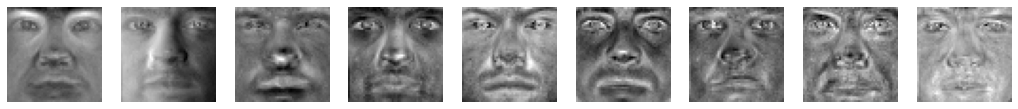

In [8]:
plt.figure(figsize=[18,10])

for i in range (9):
  plt.subplot(1,9,i+1)
  curr_img = np.reshape(smallpcaTrain.components_[i], (50,50))
  plt.imshow(curr_img.T,cmap = plt.cm.gray)
  plt.axis('off')
plt.show()


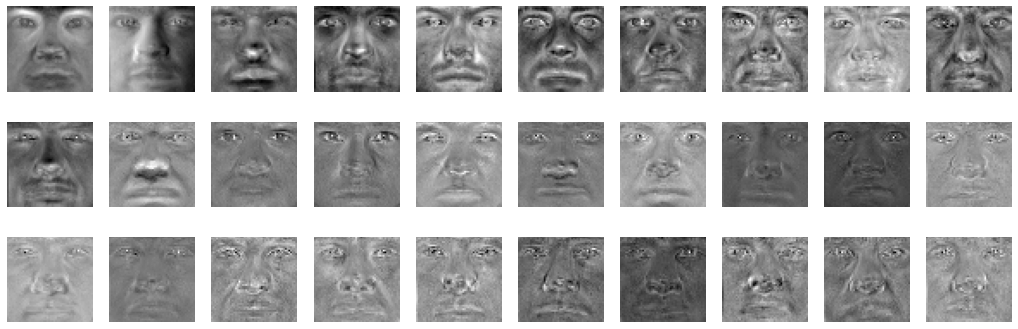

In [9]:
plt.figure(figsize=[18,6])

for i in range (30):
  plt.subplot(3,10,i+1)
  curr_img = np.reshape(largepcaTrain.components_[i], (50,50))
  plt.imshow(curr_img.T,cmap = plt.cm.gray)
  plt.axis('off')
plt.show()


In [65]:
import random

def ImageRec(image_set,smallpca,largepca):
  set_rows, set_cols = image_set.shape
  randomNumber = random.randint(0,set_cols-1)
  #original image
  plt.figure(figsize=[10,8])
  random_image = np.reshape(image_set[:,[randomNumber]].T, (50,50))
  plt.subplot(1,3,1)
  plt.imshow(random_image.T,cmap = plt.cm.gray)
  plt.axis('off')
  #reconstructed image
  transform = smallpca.transform(image_set.T)
  recons = smallpca.inverse_transform(transform)
  random_image = np.reshape(recons[[randomNumber],:], (50,50))
  plt.subplot(1,3,2)
  plt.imshow(random_image.T,cmap = plt.cm.gray)
  plt.axis('off')
  transform = largepca.transform(image_set.T)
  recons = largepca.inverse_transform(transform)
  random_image = np.reshape(recons[[randomNumber],:], (50,50))
  plt.subplot(1,3,3)
  plt.imshow(random_image.T,cmap = plt.cm.gray)
  plt.axis('off')
  plt.show()

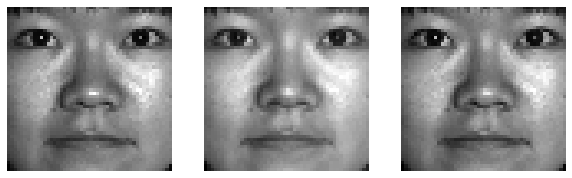

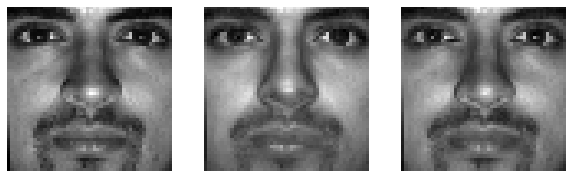

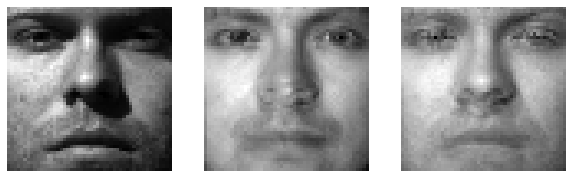

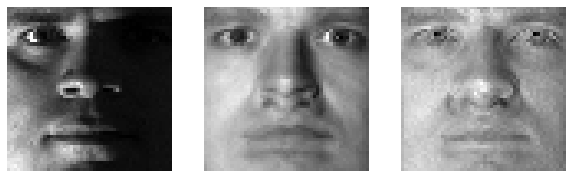

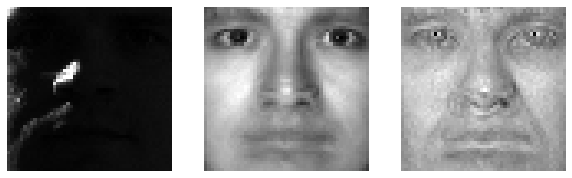

In [66]:
for j in range(1,6):
  recon_set,labels=loadImages(imageLocation,"Set_"+str(j))
  ImageRec(recon_set,smallpcaTrain,largepcaTrain)


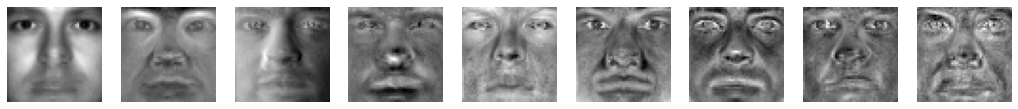

In [67]:
from sklearn.decomposition import TruncatedSVD

images, labels = loadImages(imageLocation,"Set_1")

svd = TruncatedSVD(n_components=9).fit(images.T)

plt.figure(figsize=[18,10])

for i in range (9):
  plt.subplot(1,9,i+1)
  curr_img = np.reshape(svd.components_[i], (50,50))
  plt.imshow(curr_img.T,cmap = plt.cm.gray)
  plt.axis('off')
plt.show()